In [20]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..', '..', 'analysis'))
sys.path.append(os.path.join(os.getcwd(), '..', '..', 'session'))

import numpy as np
import h5py
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats
from scipy.signal import filtfilt, butter, sosfilt, sosfreqz, lfilter
from adapters import DatProcessor

%matplotlib inline

In [21]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## AEPs extraction

In [22]:
source  = '/home/sobolev/nevermind/Andrey/data'
session, channel = '009266_hippoSIT_2023-04-13_08-57-46', 17  # ch17, very little AEPs
#session = '009266_hippoSIT_2023-04-14_09-17-34'  # ch1, very little AEPs
#session = '009266_hippoSIT_2023-04-17_09-06-10'  # ch1, little AEPs, 7 + 55 correction, 5463 events, frequency
#session = '009266_hippoSIT_2023-04-17_17-04-17'  # ch17, 20 + 55 correction, 5067 events
#session = '009266_hippoSIT_2023-04-18_10-10-37'  # ch17, 10 + 55 correction, 5682 events
#session = '009266_hippoSIT_2023-04-18_17-03-10'  # ch17, 7 + 55 correction, 5494 events
#session = '009266_hippoSIT_2023-04-19_10-33-51'  # ch17, 4 + 55 correction, 6424 events
#session = '009266_hippoSIT_2023-04-20_08-57-39'  # ch1, 1 + 55 correction, 6424 events
#session = '009266_hippoSIT_2023-04-24_16-56-55'  # ch17, 5 + 55* correction, 6165 events, frequency
#session = '009266_hippoSIT_2023-04-26_08-20-17'  # ch17, 12 + 55* correction, 6095 events, duration
#session = '009266_hippoSIT_2023-05-02_12-22-14'  # ch20, 10 + 55 correction, 5976 events, frequency
#session = '009266_hippoSIT_2023-05-04_09-11-06'  # ch17, 5 + 55* correction, 4487 events, coma session with baseline AEPs
#session = '009266_hippoSIT_2023-05-04_19-47-15'  # ch20, 2 + 55 correction, 5678 events, frequency

# Old PPC sessions (P1 is on 30ms)
#session, channel = '008229_hippoSIT_2022-05-17_21-44-43', 0  # chs: 0, 31, 54, 56; 103 corr
#session, channel = '008229_hippoSIT_2022-05-16_20-36-44', 0 # chs: 0, 56; 91 corr
#session, channel = '008229_hippoSIT_2022-05-20_15-54-39', 0 # chs: 0, 56; 65 corr
#session, channel = '008229_hippoSIT_2022-05-18_14-36-18', 0 # chs: 0, 56; 70 corr

animal      = session.split('_')[0]
sessionpath = os.path.join(source, animal, session)
h5_file     = os.path.join(source, animal, session, session + '.h5')
dat_file    = os.path.join(source, animal, session, session + '.dat')
aeps_file   = os.path.join(sessionpath, 'AEPs.h5')

In [5]:
dat_processor = DatProcessor(dat_file)

In [6]:
# get raw signal from selected channel
raw_signal = dat_processor.get_single_channel(39)

# how much memory is the signal
(raw_signal.shape[0] * 2) / 1024**2

137.33447265625

In [7]:
# 1 - remove 50Hz. Probably not possible, take just the good channel

In [8]:
# bandpass filter 0.5 - 200
low_cut  = 0.5
high_cut = 200
filt_signal = DatProcessor.butter_bandpass_filter(raw_signal, low_cut, high_cut, 30000)

In [9]:
# downsample 30 times to 1KHz
del raw_signal
down_signal = signal.decimate(filt_signal, 30)

In [10]:
# 3 - smooth? Maybe skip

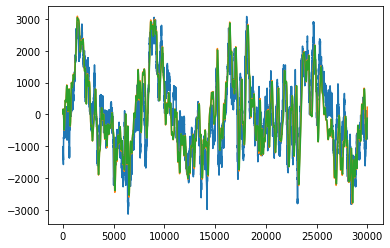

In [11]:
# test bandpass / downsampling
t_start     = 5.0 # sec
duration    = 1.0 # sec
s_rate      = 30000
down_s_rate = 1000

plt.plot(raw_signal[int(t_start*s_rate):int(t_start*s_rate) + int(duration*s_rate)])
plt.plot(filt_signal[int(t_start*s_rate):int(t_start*s_rate) + int(duration*s_rate)])
plt.plot(np.linspace(0, int(duration*s_rate), int(duration*down_s_rate)), \
         down_signal[int(t_start*down_s_rate):int(t_start*down_s_rate) + int(duration*down_s_rate)])

In [40]:
# save LFP
# with h5py.File(aeps_file, 'r') as f:
#     down_signal = np.array(f['LFP'])
    
with h5py.File(aeps_file, 'a') as f:
    if not str(channel) in f:
        f.create_group(str(channel))
    if 'LFP' in f:
        del f['LFP']
    if 'LFP' in f[str(channel)]:
        del f[str(channel)]['LFP']
    f[str(channel)].create_dataset('LFP', data=down_signal)

In [11]:
# copy from previous

selected_sessions = [
# new dual A1 / PPC sessions
'009266_hippoSIT_2023-04-17_17-04-17',  # ch17, 20 + 55 correction, 5067 events
'009266_hippoSIT_2023-04-18_10-10-37',  # ch17, 10 + 55 correction, 5682 events
'009266_hippoSIT_2023-04-18_17-03-10',  # ch17, 6 + 55 correction, 5494 events
'009266_hippoSIT_2023-04-19_10-33-51',  # ch17, 4 + 55 correction, 6424 events
'009266_hippoSIT_2023-04-20_08-57-39',  # ch1, 1 + 55 correction, 6424 events
'009266_hippoSIT_2023-04-24_16-56-55',  # ch17, 5 + 55* correction, 6165 events, frequency
'009266_hippoSIT_2023-04-26_08-20-17',  # ch17, 12 + 55* correction, 6095 events, duration
'009266_hippoSIT_2023-05-02_12-22-14',  # ch20, 10 + 55 correction, 5976 events, frequency
'009266_hippoSIT_2023-05-04_09-11-06',  # ch17, 5 + 55* correction, 4487 events, coma session with baseline AEPs
'009266_hippoSIT_2023-05-04_19-47-15',  # ch20, 2 + 55 correction, 5678 events, frequency

# old PPC data
#'008229_hippoSIT_2022-05-17_21-44-43', #0 # chs: 0, 31, 54, 56
#'008229_hippoSIT_2022-05-16_20-36-44', #0 # chs: 0, 56
#'008229_hippoSIT_2022-05-20_15-54-39', #0 # chs: 0, 56
#'008229_hippoSIT_2022-05-18_14-36-18', #0 # chs: 0, 56
]

In [13]:
for session in selected_sessions:
    animal      = session.split('_')[0]
    sessionpath = os.path.join(source, animal, session)
    aeps_file   = os.path.join(sessionpath, 'AEPs.h5')

    with h5py.File(aeps_file, 'r') as f:
        aeps_events = np.array(f['aeps_events'])
        LFP = np.array(f['LFP'])
        aeps = np.array(f['aeps'])

    with h5py.File(aeps_file, 'a') as f:
        if 'A1' in f:
            del f['A1']

        grp = f.create_group('A1')
        grp.create_dataset('LFP', data=LFP)
        grp.create_dataset('aeps', data=aeps)
        
    print("session %s done" % session)

session 009266_hippoSIT_2023-04-17_17-04-17 done
session 009266_hippoSIT_2023-04-18_10-10-37 done
session 009266_hippoSIT_2023-04-18_17-03-10 done
session 009266_hippoSIT_2023-04-19_10-33-51 done
session 009266_hippoSIT_2023-04-20_08-57-39 done
session 009266_hippoSIT_2023-04-24_16-56-55 done
session 009266_hippoSIT_2023-04-26_08-20-17 done
session 009266_hippoSIT_2023-05-02_12-22-14 done
session 009266_hippoSIT_2023-05-04_09-11-06 done
session 009266_hippoSIT_2023-05-04_19-47-15 done


## Extract AEPs from downsampled LFP

In [122]:
# get LFP
with h5py.File(aeps_file, 'r') as f:
    down_signal = np.array(f[str(channel)]['LFP'])

In [123]:
# get sound events
with h5py.File(h5_file, 'r') as f:
    tl = np.array(f['processed']['timeline'])
    events = np.array(f['raw']['sounds'])

# normalize time to session start
events[:, 0] -= events[0][0]

# select only target / background presentations
events = events[(events[:, 1] == 1) | (events[:, 1] == 2)]
events = events[:-1]
len(events)

5913

In [127]:
# constructing AEP matrix
duration    = 0.2  # sec
down_s_rate = 1000  # Hz
event_lat   = 0.0  # sound latency in sec

# sound timing correction array
def get_correction_for_sounds(events):
    # N1 should be at 20ms
    # then if N1 is from 33 to 88 correction should be from 13 to 68 ms
    duration = events[-1][0] - events[0][0]
    corrected = np.array([70 + 55*(t/duration) for t in events[:, 0]]) / 1000 # to get it in seconds
    return corrected

def extract_aeps(events):
    aeps = np.zeros([len(events), int(duration*down_s_rate)])
    corr = get_correction_for_sounds(events)
    
    for i, event in enumerate(events):
        t_event = event[0] + corr[i]  # NOTE: linear correction applied!
        idx_event = int((t_event + event_lat)*down_s_rate)
        aeps[i] = down_signal[idx_event:idx_event + int(duration*down_s_rate)]
    
    return aeps

aeps = extract_aeps(events)

events_corrected = np.zeros(events.shape)
events_corrected[:, 1] = events[:, 1]
events_corrected[:, 0] = events[:, 0] + get_correction_for_sounds(events)

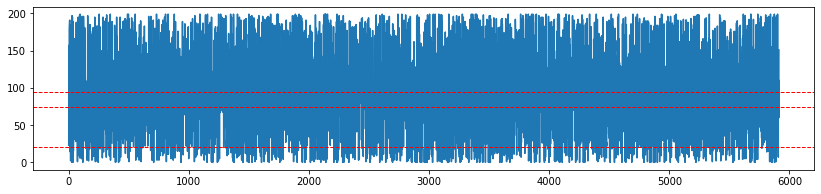

In [128]:
# Check drift of sound pulses - plot AEP min positions
mins = aeps.argmin(axis=1)
t_N1 = 20

fig = plt.figure(figsize=(14, 3))
ax = fig.add_subplot(111)
ax.plot(mins)
#plt.ylim(60, 100)
plt.axhline(t_N1, color='red', ls='--', lw=1)
plt.axhline(75, color='red', ls='--', lw=1)
plt.axhline(95, color='red', ls='--', lw=1)
#plt.plot([0, 6643], [33, 88])

In [129]:
# save AEPs to file
with h5py.File(aeps_file, 'a') as f:
    if 'aeps' in f:
        del f['aeps']
    if 'aeps' in f[str(channel)]:
        del f[str(channel)]['aeps']
    if 'aeps_events' in f:
        del f['aeps_events']
        
    f[str(channel)].create_dataset('aeps', data=aeps)
    f.create_dataset('aeps_events', data=events_corrected)

## P1, N1, P2, P3 metrics extraction

In [23]:
def get_metric(aeps, t_l, t_r, k_width=20):
    # extracts areas for a given time window
    # returns original and smoothed/normed areas
    def to_normed(data):
        normed = data - data.min() 
        return normed/(normed.max() - normed.min())

    # extracting interval values
    metric = aeps[:, t_l:t_r].sum(axis=1)
    m_mean, m_std = metric.mean(), metric.std()
    metric[metric > m_mean + 3*m_std] = m_mean + 3*m_std
    metric[metric < m_mean - 3*m_std] = m_mean - 3*m_std
    
    # z-scored
    metric_z = stats.zscore(metric)
    
    # smoothed
    kernel = signal.gaussian(k_width, std=(k_width) / 7.2)
    metric_smooth = np.convolve(metric_z, kernel, 'same') / kernel.sum()
    
    return metric, metric_smooth #to_normed(metric_smooth)

In [24]:
selected_sessions = [
'009266_hippoSIT_2023-04-17_17-04-17',  # ch17, 20 + 55 correction, 5067 events
'009266_hippoSIT_2023-04-18_10-10-37',  # ch17, 10 + 55 correction, 5682 events
'009266_hippoSIT_2023-04-18_17-03-10',  # ch17, 6 + 55 correction, 5494 events
'009266_hippoSIT_2023-04-19_10-33-51',  # ch17, 4 + 55 correction, 6424 events
'009266_hippoSIT_2023-04-20_08-57-39',  # ch1, 1 + 55 correction, 6424 events
'009266_hippoSIT_2023-04-24_16-56-55',  # ch17, 5 + 55* correction, 6165 events, frequency
'009266_hippoSIT_2023-04-26_08-20-17',  # ch17, 12 + 55* correction, 6095 events, duration
'009266_hippoSIT_2023-05-02_12-22-14',  # ch20, 10 + 55 correction, 5976 events, frequency
'009266_hippoSIT_2023-05-04_09-11-06',  # ch17, 5 + 55* correction, 4487 events, coma session with baseline AEPs
'009266_hippoSIT_2023-05-04_19-47-15',  # ch20, 2 + 55 correction, 5678 events, frequency

# old PPC data
#'008229_hippoSIT_2022-05-17_21-44-43', #0 # chs: 0, 31, 54, 56
#'008229_hippoSIT_2022-05-16_20-36-44', #0 # chs: 0, 56
#'008229_hippoSIT_2022-05-20_15-54-39', #0 # chs: 0, 56
#'008229_hippoSIT_2022-05-18_14-36-18', #0 # chs: 0, 56
]

# A1 metric boundaries
metric_lims = {
    'P1':  (15, 25),
    'N1':  (30, 75),
    'P2':  (75, 95),
    'P3':  (95, 175),
}

# PPC metric boundaries
# metric_lims = {
#     'P1':  (20, 36),
#     'N1':  (36, 62),
#     'P2':  (62, 80),
#     'P3':  (80, 135),
# }

#channel = 0
area = 'A1'

In [25]:
# change OUTLIER boundaries before computing!!
for session in selected_sessions:
    animal      = session.split('_')[0]
    sessionpath = os.path.join(source, animal, session)
    aeps_file   = os.path.join(sessionpath, 'AEPs.h5')
    
    with h5py.File(aeps_file, 'r') as f:
        aeps = np.array(f[area]['aeps'])
        aeps_events = np.array(f['aeps_events'])
        
    # remove outliers
    #aeps[aeps > 1500]  = 1500
    #aeps[aeps < -1500] = -1500
    aeps[aeps > 5000]  = 5000
    aeps[aeps < -5000] = -5000

    metrics_raw, metrics_norm  = {}, {}

    for m, bound in metric_lims.items():
        m_raw, m_norm = get_metric(aeps, bound[0], bound[1])
        metrics_raw[m]  = m_raw
        metrics_norm[m] = m_norm #if m == 'N1' else m_norm * (-1) + 1
        
    # save metrics to file
    with h5py.File(aeps_file, 'a') as f:
        grp = f[area]
        if not 'raw' in grp:
            grp.create_group('raw')
        if not 'norm' in grp:
            grp.create_group('norm')

        for m_del_name in ['N1', 'P1', 'N2', 'N3']:
            if m_del_name in grp['norm']:
                del grp['norm'][m_del_name]
            if m_del_name in grp['raw']:
                del grp['raw'][m_del_name]

        for m_name in metrics_raw.keys():
            if m_name in grp['raw']:
                del grp['raw'][m_name]
            if m_name in grp['norm']:
                del grp['norm'][m_name]
            d = grp['raw'].create_dataset(m_name, data=metrics_raw[m_name])
            d.attrs['limits'] = ','.join([str(x) for x in metric_lims[m_name]])
            d = grp['norm'].create_dataset(m_name, data=metrics_norm[m_name])
            d.attrs['limits'] = ','.join([str(x) for x in metric_lims[m_name]])
            grp.attrs['limits'] = ','.join([str(x) for x in metric_lims[m_name]])
           
    print('Session %s done' % session)

Session 009266_hippoSIT_2023-04-17_17-04-17 done
Session 009266_hippoSIT_2023-04-18_10-10-37 done
Session 009266_hippoSIT_2023-04-18_17-03-10 done
Session 009266_hippoSIT_2023-04-19_10-33-51 done
Session 009266_hippoSIT_2023-04-20_08-57-39 done
Session 009266_hippoSIT_2023-04-24_16-56-55 done
Session 009266_hippoSIT_2023-04-26_08-20-17 done
Session 009266_hippoSIT_2023-05-02_12-22-14 done
Session 009266_hippoSIT_2023-05-04_09-11-06 done
Session 009266_hippoSIT_2023-05-04_19-47-15 done
